In [6]:
from CUSP.process import *

Load model: ../src/CUSP/pretrained_model/CUSP_pretrained_model_20ms.pth
Load .bin data: ../data/example_data.bin
Data length: 1800000, Data total time: 60.0 second
CS anchor: 32
Determine channel range based on ch_anchor
De-mean per channel
De-median across channel
De-median local channel
Filt LFP
Filt AP
Model predict


100%|██████████| 94/94 [00:11<00:00,  8.14it/s]


Model predict elapsed time: 11.554248809814453 seconds
Model out conv
First detect CS, threshold quantile: 0.7
First detect CS, num: 7152
Re-align to local abs CS peak
Num after re-align: 7150
Remove double counting
Num after remove double counting: 5468
First clustering from waveform
Fit UMAP
DBSCAN clustering
DBSCAN zero embedding


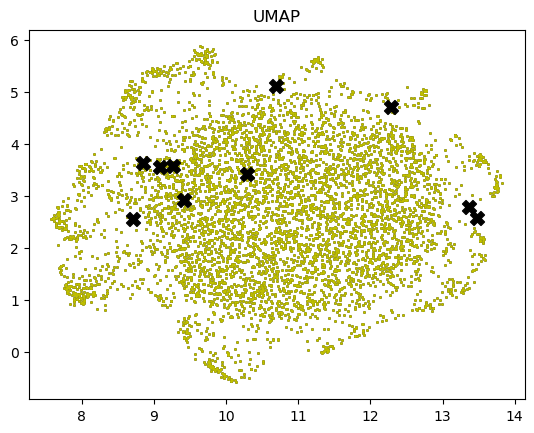

Error: No complex spike cluster found! Check your signal!
CS anchor: 64
Determine channel range based on ch_anchor
De-mean per channel
De-median across channel
De-median local channel
Filt LFP
Filt AP
Model predict


100%|██████████| 94/94 [00:11<00:00,  8.49it/s]


Model predict elapsed time: 11.066624879837036 seconds
Model out conv
First detect CS, threshold quantile: 0.7
First detect CS, num: 6689
Re-align to local abs CS peak
Num after re-align: 6689
Remove double counting
Num after remove double counting: 5270
First clustering from waveform
Fit UMAP
DBSCAN clustering
DBSCAN zero embedding


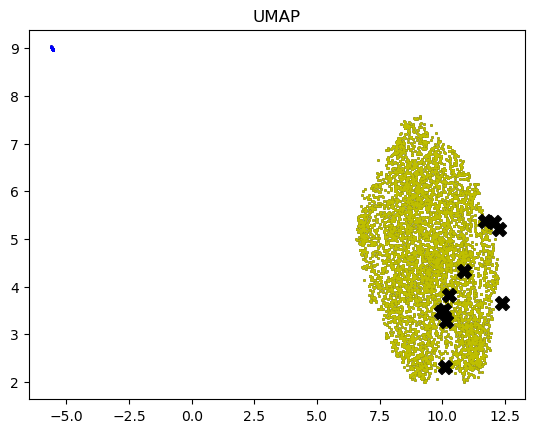

Detect CS cluster on channel: 66, num: 35
CS anchor: 96
Determine channel range based on ch_anchor
De-mean per channel
De-median across channel
De-median local channel
Filt LFP
Filt AP
Model predict


100%|██████████| 94/94 [00:11<00:00,  8.06it/s]


Model predict elapsed time: 11.66428542137146 seconds
Model out conv
First detect CS, threshold quantile: 0.7
First detect CS, num: 7114
Re-align to local abs CS peak
Num after re-align: 7113
Remove double counting
Num after remove double counting: 5618
First clustering from waveform
Fit UMAP
DBSCAN clustering
DBSCAN zero embedding


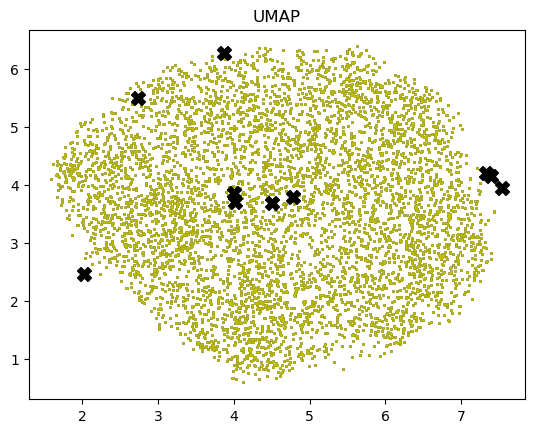

Error: No complex spike cluster found! Check your signal!
Done forward_CS_anchor_list!
CS results saved to: ./examples_results/CS_results.pkl


In [ ]:
# params
params = {}
params['fs'] = 30000
params['fs_ms'] = params['fs']/1000
params['N_ch'] = 128
params['L_segment_batch'] = 64 # increase batch with larger GPU memory
params['L_segment_len'] = int(params['fs_ms']*20) # segment length of each processing
params['L_segment_step'] = int(params['fs_ms']*10) # step for index moving forward in for-loop
params['L_segment_edge_discard'] = int(params['fs_ms']*2.5) # each batch edge remove
# DBSCAN clustering params
params['CS_seg_ms'] = [5,7] # pre,post, CS window
params['DBSCAN_eps'] = 1
params['CS_peak_sign'] = -1 # CS peak sign
params['CS_detect_threshold_quantile'] = 0.7
params['if_cluster_waveform'] = True
params['enable_plot'] = True
# preprocess params
params['lfp_filt_order'] = 3
params['lfp_filt_band'] = [30,400]
params['ap_filt_order'] = 3
params['ap_filt_band'] = [300,3000]
params['ch_anchor'] = -1 # 1-128


params['model_path'] = '../src/CUSP/pretrained_model/CUSP_pretrained_model_20ms.pth'
params['data_path'] = '../data/example_data.bin'
save_path = './examples_results/CS_results.pkl'


# run CUSP
my_CSsort = CUSP_pipeline(params)
# we can run with different channel anchor list based on ROI on the probe
anchor_list = [32,64,96]
my_CSsort.forward_CS_anchor_list(anchor_list)
pickle.dump([my_CSsort.CS_peak_channel_list, my_CSsort.CS_clustered_x_idx_list], open(save_path, 'wb'))
print("CS results saved to: "+save_path)

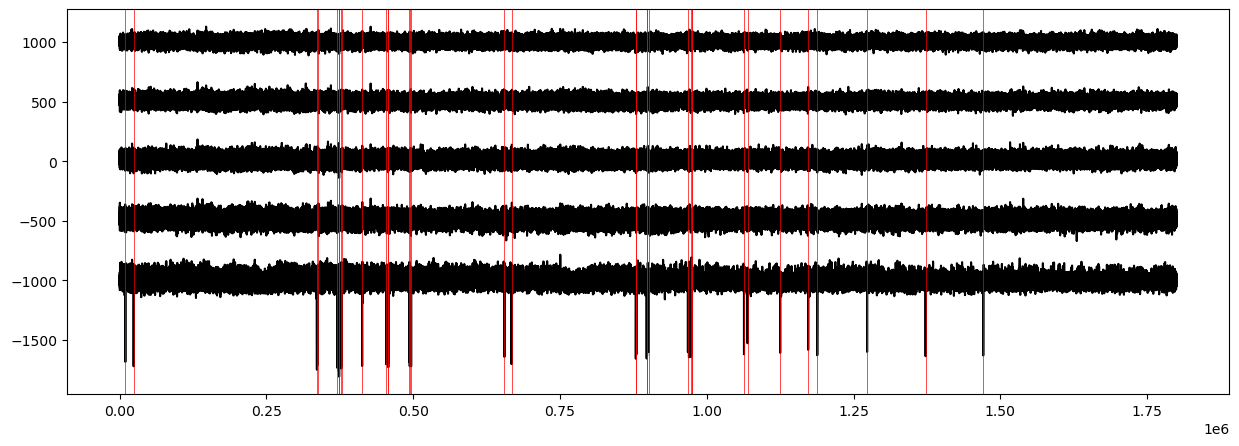

In [8]:
%matplotlib inline
plt.figure(figsize=(15,5))

plt.plot(my_CSsort.Neural[:,62]+1000, 'k')
plt.plot(my_CSsort.Neural[:,63]+500, 'k')
plt.plot(my_CSsort.Neural[:,64], 'k')
plt.plot(my_CSsort.Neural[:,65]-500, 'k')
plt.plot(my_CSsort.Neural[:,66]-1000, 'k')

temp = np.array(my_CSsort.CS_clustered_x_idx_list[1][0])
for x in temp:
    plt.axvline(x, color='r',linewidth=0.5)